In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd

### Import coffea files

In [2]:
prefix = './coffea/'

In [3]:
bkg_histo = util.load(f'{prefix}/background_v7_SR_dPhiMETj0Tight_BDTretrain.coffea')[0]

In [4]:
# AOD + old x-cleaning
bkg_files_legacy = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos_legacy = {}

for b in bkg_files_legacy.keys():
    bkg_histos_legacy[b] = util.load(f'../Ntuple_Update_April/coffea/{bkg_files_legacy[b]}_AOD_OldXclean.coffea')[0]

### Efficiency

#### MINIAOD + new x-cleaning + v5 good_vtx + dPhiMETj0 tighter to 2.0 + BDT retrained

In [5]:
pd.options.display.float_format = '{:,.8f}'.format

In [6]:
df_cutflow = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow', isLegacy = False)
df_cutflow

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",BDT
WJets,0.00053264,0.00000391,0.00000391,0.00000317,0.00000306,0.00000305,0.00000304,0.00000280,0.00000007
ZJets,0.00134318,0.00001834,0.00001834,0.00001523,0.00001454,0.00001448,0.00001444,0.00001367,0.00000032
Multiboson,0.00030946,0.00000270,0.00000270,0.00000184,0.00000165,0.00000159,0.00000155,0.00000151,0.00000000
DY,0.00000589,0.00000009,0.00000009,0.00000008,0.00000007,0.00000007,0.00000007,0.00000007,0.00000002
QCD,0.00000044,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Top,0.00009061,0.00000151,0.00000151,0.00000114,0.00000103,0.00000096,0.00000096,0.00000076,0.00000001
Total,0.00000631,0.00000006,0.00000006,0.00000004,0.00000004,0.00000004,0.00000004,0.00000004,0.00000000


In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
df_cutflow_cts = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)
df_cutflow_cts

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",BDT
WJets,"93,278.66",684.49,684.49,555.78,535.70,533.59,532.70,489.98,12.56
ZJets,"28,746.13",392.58,392.58,325.98,311.20,309.96,309.04,292.60,6.88
Multiboson,"2,156.81",18.83,18.83,12.81,11.48,11.06,10.77,10.50,0.00
DY,"1,895.29",30.41,30.41,27.03,23.65,23.65,23.65,23.65,6.76
QCD,"9,553.01",80.77,80.77,0.47,0.47,0.47,0.47,0.00,0.00
Top,"3,966.40",66.32,66.32,49.98,45.01,41.87,41.85,33.10,0.50
Total,"139,596.30","1,273.39","1,273.39",972.04,927.51,920.60,918.47,849.83,26.70


In [9]:
pd.options.display.float_format = '{:,.1f}'.format

In [10]:
df_cutflow_raw = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)
df_cutflow_raw

,Preselections,n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2","dPhi(MET,all jets) > 0.75",BDT
WJets,331197,2107,2107,1583,1531,1525,1511,1323,35
ZJets,255365,2964,2964,2328,2252,2243,2216,1953,41
Multiboson,10204,94,94,64,58,56,55,53,0
DY,561,9,9,8,7,7,7,7,2
QCD,3422,21,21,2,2,2,2,0,0
Top,25887,358,358,249,192,188,187,166,8
Total,626636,5553,5553,4234,4042,4021,3978,3502,86


#### AOD + old x-cleaning + OSSF&ID good_vtx + dPhiMETj0 "loose" of 1.5 + BDT legacy

In [11]:
pd.options.display.float_format = '{:,.8f}'.format

In [12]:
df_cutflow_legacy = utils.get_bkg_cutflow_df(bkg_histos_legacy, 'cutflow', isLegacy = True)
df_cutflow_legacy

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,0.00000177,0.00000009,0.00000009,0.00000006,0.00000006,0.00000006,0.00000006,0.00000003,0.00000001,0.00000000
Top,0.00012947,0.00001277,0.00001277,0.00000799,0.00000717,0.00000715,0.00000715,0.00000672,0.00000079,0.00000000
DY,0.00001126,0.00000184,0.00000184,0.00000181,0.00000181,0.00000181,0.00000181,0.00000168,0.00000136,0.00000000
Diboson,0.00063730,0.00004435,0.00004435,0.00003273,0.00003073,0.00003043,0.00003030,0.00002728,0.00000523,0.00000000
Triboson,0.00193257,0.00015769,0.00015769,0.00010408,0.00009154,0.00009138,0.00009123,0.00007610,0.00001467,0.00000000
W+jets,0.00230996,0.00017293,0.00017293,0.00013873,0.00013153,0.00013127,0.00013122,0.00011391,0.00001950,0.00000009
Z+jets,0.00664534,0.00039832,0.00039832,0.00032510,0.00030958,0.00030900,0.00030896,0.00029235,0.00007296,0.00000011
Total,0.00001878,0.00000133,0.00000133,0.00000108,0.00000103,0.00000103,0.00000103,0.00000090,0.00000024,0.00000000


In [13]:
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
df_cutflow_cts_legacy = utils.get_bkg_cutflow_df(bkg_histos_legacy, 'cutflow_cts', isLegacy = True)
df_cutflow_cts_legacy

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,"38,039.83","1,882.67","1,882.67","1,326.86","1,319.01","1,319.01","1,318.41",632.25,320.05,0.00
Top,"5,667.49",559.22,559.22,349.76,314.03,312.99,312.95,294.00,34.52,0.00
DY,"14,495.72","2,373.75","2,373.75","2,325.57","2,325.57","2,325.57","2,325.57","2,157.97","1,750.49",0.00
Diboson,"4,424.20",307.91,307.91,227.24,213.36,211.27,210.33,189.35,36.30,0.00
Triboson,53.00,4.32,4.32,2.85,2.51,2.51,2.50,2.09,0.40,0.00
W+jets,"227,212.60","17,009.81","17,009.81","13,645.63","12,937.21","12,911.49","12,907.15","11,204.39","1,918.22",9.30
Z+jets,"142,220.15","8,524.55","8,524.55","6,957.67","6,625.48","6,613.11","6,612.30","6,256.76","1,561.49",2.31
Total,"432,113.00","30,662.23","30,662.23","24,835.58","23,737.17","23,695.95","23,689.22","20,736.81","5,621.48",11.62


In [15]:
pd.options.display.float_format = '{:,.1f}'.format

In [16]:
df_cutflow_raw_legacy = utils.get_bkg_cutflow_df(bkg_histos_legacy, 'cutflow_nevts', isLegacy = True)
df_cutflow_raw_legacy

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,computing BDT score,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75","minDxy(e1, e2) > 0.01",BDT
QCD,12311,381,381,160,159,159,158,3,2,0
Top,49818,4688,4688,3058,2348,2337,2336,2006,353,0
DY,205,14,14,12,12,12,12,10,3,0
Diboson,18067,1234,1234,915,860,852,848,767,149,0
Triboson,2257,170,170,116,106,105,104,92,13,0
W+jets,697657,48425,48425,37015,35472,35415,35377,29090,4981,30
Z+jets,1281459,67427,67427,52627,50986,50934,50903,44480,11198,19
Total,2061774,122339,122339,93903,89943,89814,89738,76448,16699,49


In [17]:
def plot_bkg_efficiency(bkg_histos, df, isLegacy, label = 'default', processes = 'all', doLog = True, ylabel = '', title = ''):
    if processes == 'all':
        processes = df.index.values.tolist()
    cuts = utils.get_bkg_list_of_cuts(bkg_histos, isLegacy = isLegacy)
    cuts[1] = 'nGoodVtx > 0'
    cuts[6] = 'dPhi(MET,leading jet)'
    
    # Color map for each process
    # cmap = mpl.colormaps['Set3'].colors
    # cmap = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"] # cms-recommended for 6-color scheme
    cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
    
    colors = { 'W+jets': cmap[0],
               'Z+jets': cmap[1],
               'QCD': cmap[2],
               'DY': cmap[3],
               'Top': cmap[4],
               'TTJetsDiLept': cmap[5],
               'Diboson': cmap[6],
               'Triboson': cmap[7],
               'Total': cmap[8],
               'WJets': cmap[0],
               'ZJets': cmap[1],
               'Multiboson': cmap[6]
    }

    
    for process in processes:
        if label != 'default':
            labels = label
        else:
            labels = process
        plt.plot(cuts, df.loc[process], label=labels, color = colors[process])
        #plt.plot(cuts, df.loc[process], label=labels)

    plt.grid()

    if doLog:
        plt.yscale('log')
    
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
    plt.legend()

In [18]:
def plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, label, doLog = True, ylabel = '', title = ''):
    cuts = utils.get_signal_list_of_cuts(sig_histo)

    m1_list = []
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1 = int(sig_dict['m1'])
        m1_list.append(m1)

    df['m1'] = m1_list
    df = df.sort_values(by=['m1']) # sort by m1
    df.pop('m1')
        
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1 = int(sig_dict['m1'])
        delta = sig_dict['delta']
        dmchi = sig_dict['dmchi']
        ctau = int(sig_dict['ctau'])
        
        if (m1 in m1s) and (delta in deltas):
            if ctau in ctaus:
                plt.plot(cuts, df.loc[point], label=label)

    plt.grid()

    if doLog:
        plt.yscale('log')
    
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
    plt.legend()

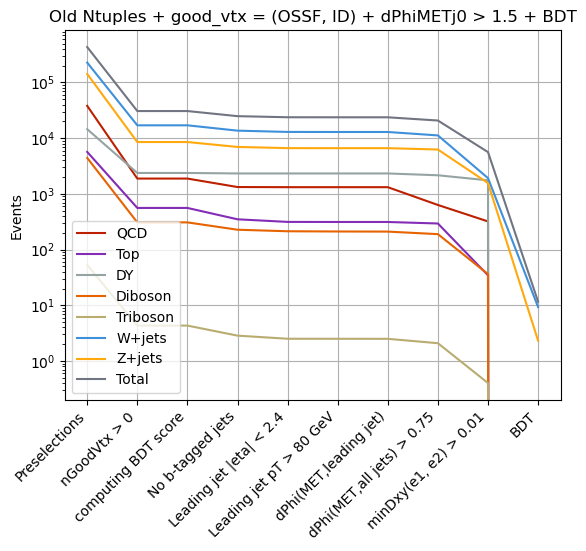

In [19]:
title = 'Old Ntuples + good_vtx = (OSSF, ID) + dPhiMETj0 > 1.5 + BDT'
ylabel = 'Events'

plot_bkg_efficiency(bkg_histos_legacy, df_cutflow_cts_legacy, isLegacy = True, doLog = True, ylabel = ylabel, title = title)

#processes = ['Total']
#plot_bkg_efficiency(bkg_histo, df_cutflow, processes = processes, label = 'New Ntuples + good_vtx = (v5) + dPhiMETj0 > 2.0 + BDT retrain', isLegacy = False, doLog = True, ylabel = ylabel, title = title)
#plot_bkg_efficiency(bkg_histos_legacy, df_cutflow_cts_legacy, processes = processes, label = 'Total Background', isLegacy = True, doLog = True, ylabel = ylabel, title = title)

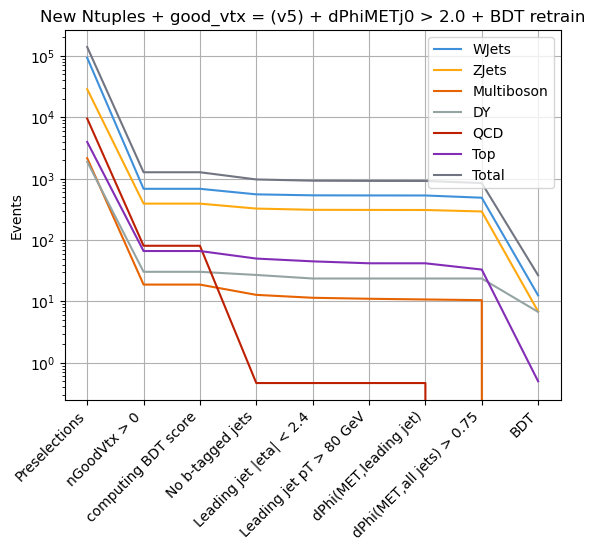

In [20]:
title = 'New Ntuples + good_vtx = (v5) + dPhiMETj0 > 2.0 + BDT retrain'
ylabel = 'Events'

plot_bkg_efficiency(bkg_histo, df_cutflow_cts, isLegacy = False, doLog = True, ylabel = ylabel, title = title)

#processes = ['Total']
#plot_bkg_efficiency(bkg_histo, df_cutflow, processes = processes, label = 'New Ntuples + good_vtx = (v5) + dPhiMETj0 > 2.0 + BDT retrain', isLegacy = False, doLog = True, ylabel = ylabel, title = title)
#plot_bkg_efficiency(bkg_histos_legacy, df_cutflow_cts_legacy, processes = processes, label = 'Total Background', isLegacy = True, doLog = True, ylabel = ylabel, title = title)